# Pandas
***pandas*** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Source: http://pandas.pydata.org/pandas-docs/stable/

# 10 Minutes to pandas
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

The original document is posted at http://pandas.pydata.org/pandas-docs/stable/10min.html

Customarily, we import as follows:

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

When we worked with Numpy arrays, one limitation was that a numpy ndarray can only hold one type of data (there are ways of getting around that, but they take away some of the nice advantages of numpy!). More often than not, real-world data sets contain mixed data that can have strings, dates, and numerical values for each "element". That is where pandas data frames show their real advantage. 

## Object Creation

...

Pandas has Series (1-dim labeled lists) and DataTables (2-dim tables with column names and row labels). 

We'll start off by looking at Series. 

Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [4]:
s = pd.Series([1,3,5,np.nan,6,8], index=[x**2 for x in range(6)])
s

0     1.0
1     3.0
4     5.0
9     NaN
16    6.0
25    8.0
dtype: float64

In [5]:
dates = pd.date_range('20210101', periods=6, freq='M')
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

Creating a `DataFrame` by passing a numpy array, with a datetime index and labeled columns:

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns = ['Ann', "Bob", "Charly", "Don"])
                  ## columns=list('ABCD'))
df

,Ann,Bob,Charly,Don
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,-0.010724


You can operate on the columns:

In [7]:
df.Charly+df.Don

2021-01-31   -1.431033
2021-02-28   -0.347899
2021-03-31   -3.169661
2021-04-30   -0.277575
2021-05-31    1.230790
2021-06-30    1.587176
Freq: M, dtype: float64

This example illustrates some objects that can be put into DataFrames (with dtype specification):

In [8]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20210102'),
                    'C' : pd.Series(1,index=list(['a','b','c','d']),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
a,1.0,2021-01-02,1.0,3,test,foo
b,1.0,2021-01-02,1.0,3,train,foo
c,1.0,2021-01-02,1.0,3,test,foo
d,1.0,2021-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Another simple example:

In [10]:
df3 = pd.DataFrame(np.random.rand(3,4), columns=['ValuesA','ValuesB','C','D'], index=[x**2 for x in range(3)])
df3['CplusD'] = df3.C+df3.D
df3

,ValuesA,ValuesB,C,D,CplusD
0,0.422937,0.412294,0.904441,0.260060,1.164501
1,0.153318,0.353985,0.497309,0.631857,1.129166
4,0.621017,0.324498,0.133280,0.546816,0.680096


If you’re using Jupyter, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
<pre>
In [13]: df2.&lt;TAB&gt;
df2.A                  df2.boxplot
df2.abs                df2.C
df2.add                df2.clip
df2.add_prefix         df2.clip_lower
df2.add_suffix         df2.clip_upper
df2.align              df2.columns
df2.all                df2.combine
df2.any                df2.combineAdd
df2.append             df2.combine_first
df2.apply              df2.combineMult
df2.applymap           df2.compound
df2.as_blocks          df2.consolidate
df2.asfreq             df2.convert_objects
df2.as_matrix          df2.copy
df2.astype             df2.corr
df2.at                 df2.corrwith
df2.at_time            df2.count
df2.axes               df2.cov
df2.B                  df2.cummax
df2.between_time       df2.cummin
df2.bfill              df2.cumprod
df2.blocks             df2.cumsum
df2.bool               df2.D
</pre>
As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

# Viewing Data
See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

See the top & bottom rows of the frame

In [11]:
df.head(3)

,Ann,Bob,Charly,Don
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399


In [12]:
df.tail(3)

,Ann,Bob,Charly,Don
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,-0.010724


In [13]:
df.index

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [14]:
df.columns

Index(['Ann', 'Bob', 'Charly', 'Don'], dtype='object')

In [15]:
df.values

array([[ 1.36640828e+00, -1.17647706e+00, -9.84734530e-01,
        -4.46298230e-01],
       [ 2.33253509e+00, -1.31295643e+00, -3.47121242e-01,
        -7.77287059e-04],
       [-1.70269556e+00, -5.90676521e-01, -1.31526178e+00,
        -1.85439941e+00],
       [-1.22494494e+00,  9.56289253e-01,  6.47966398e-01,
        -9.25541737e-01],
       [ 7.68189488e-01,  3.62011885e-01,  1.07371674e+00,
         1.57073386e-01],
       [ 1.46520486e+00,  2.17172125e+00,  1.59789964e+00,
        -1.07240821e-02]])

In [16]:
df.describe()

,Ann,Bob,Charly,Don
count,6.000000,6.000000,6.000000,6.000000
mean,0.500783,0.068319,0.112078,-0.513445
std,1.608707,1.355785,1.172242,0.766504
min,-1.702696,-1.312956,-1.315262,-1.854399
25%,-0.726661,-1.030027,-0.825331,-0.805731
50%,1.067299,-0.114332,0.150423,-0.228511
75%,1.440506,0.807720,0.967279,-0.003264
max,2.332535,2.171721,1.597900,0.157073


In [17]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [18]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [19]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


## Transposing your data

In [20]:
df.T

,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
Ann,1.366408,2.332535,-1.702696,-1.224945,0.768189,1.465205
Bob,-1.176477,-1.312956,-0.590677,0.956289,0.362012,2.171721
Charly,-0.984735,-0.347121,-1.315262,0.647966,1.073717,1.597900
Don,-0.446298,-0.000777,-1.854399,-0.925542,0.157073,-0.010724


## Sorting by an axis

In [34]:
df.sort_index(axis=1, ascending=False)

,Don,Charly,Bob,Ann
2021-01-31,-0.446298,-0.984735,-1.176477,1.366408
2021-02-28,-0.000777,-0.347121,-1.312956,2.332535
2021-03-31,-1.854399,-1.315262,-0.590677,-1.702696
2021-04-30,-0.925542,0.647966,0.956289,-1.224945
2021-05-31,0.157073,1.073717,0.362012,0.768189
2021-06-30,-0.010724,1.597900,2.171721,1.465205


In [31]:
df.sort_index(axis=0).sort_values(by=['Bob','Ann'], ascending=True)

,Ann,Bob,Charly,Don
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-06-30,1.465205,2.171721,1.597900,-0.010724


## Sorting by values

In [28]:
df.sort_index(axis=0).sort_values(by=['Bob','Ann'], ascending=True)

,Ann,Bob,Charly,Don
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-06-30,1.465205,2.171721,1.597900,-0.010724


# Selection
***Note:*** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, .`iat`, `.loc`, `.iloc`.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced).

Basically: `loc` is for label-based indexing; `iloc` is for indexing by row number; `ix` first tries to use labels, and if it fails, it goes to integer row-number indexing. These methods can all be used to select several elements at once. By contrast, `at` provides fast label-based indexing _for a single element_, and `iat` provides fast row-number indexing _for a single element_.


Selecting a single column, which yields a `Series`, equivalent to `df.Ann`

In [35]:
df.Ann

2021-01-31    1.366408
2021-02-28    2.332535
2021-03-31   -1.702696
2021-04-30   -1.224945
2021-05-31    0.768189
2021-06-30    1.465205
Freq: M, Name: Ann, dtype: float64

In [22]:
df['Ann']

2021-01-31   -1.280378
2021-02-28    0.397114
2021-03-31    0.070645
2021-04-30   -0.278792
2021-05-31    1.157595
2021-06-30    0.836054
Freq: M, Name: Ann, dtype: float64

Selecting via [], which slices the rows.

In [43]:
df[1:3] # 2nd and 3rd row

,Ann,Bob,Charly,Don
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399


In [44]:
df['20210228':'20210331']

,Ann,Bob,Charly,Don
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399


## Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [45]:
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [46]:
dates[0]

Timestamp('2021-01-31 00:00:00', freq='M')

In [47]:
df

,Ann,Bob,Charly,Don
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,-0.010724


In [48]:
df.loc[dates[0:3]]

,Ann,Bob,Charly,Don
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399


Selecting on a multi-axis by label

In [49]:
df.loc[:,['Ann','Bob']]

,Ann,Bob
2021-01-31,1.366408,-1.176477
2021-02-28,2.332535,-1.312956
2021-03-31,-1.702696,-0.590677
2021-04-30,-1.224945,0.956289
2021-05-31,0.768189,0.362012
2021-06-30,1.465205,2.171721


Showing label slicing, both endpoints are *included*

In [57]:
df.loc['20210131':'20210430',['Ann','Bob']]

,Ann,Bob
2021-01-31,1.366408,-1.176477
2021-02-28,2.332535,-1.312956
2021-03-31,-1.702696,-0.590677
2021-04-30,-1.224945,0.956289


Reduction in the dimensions of the returned object

In [62]:
df.loc['20210131',['Ann','Bob']]

Ann    1.366408
Bob   -1.176477
Name: 2021-01-31 00:00:00, dtype: float64

In [63]:
type(df.loc['20210131',['Ann','Bob']])

pandas.core.series.Series

In [64]:
type(df.loc['20210131':'20210430',['Ann','Bob']])

pandas.core.frame.DataFrame

## Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [32]:
df

,Ann,Bob,Charly,Don
2021-01-31,-1.280378,-1.106340,0.073444,-0.915275
2021-02-28,0.397114,0.933087,-0.104112,2.590852
2021-03-31,0.070645,-0.212290,-0.231270,0.080863
2021-04-30,-0.278792,-1.284258,0.295185,1.691480
2021-05-31,1.157595,0.392772,0.092873,1.313350
2021-06-30,0.836054,0.351432,-0.023265,1.187322


In [33]:
df.iloc[3]

Ann      -0.278792
Bob      -1.284258
Charly    0.295185
Don       1.691480
Name: 2021-04-30 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [34]:
df.iloc[3:5,0:2]

,Ann,Bob
2021-04-30,-0.278792,-1.284258
2021-05-31,1.157595,0.392772


By lists of integer position locations, similar to the numpy/python style

In [65]:
df.iloc[[1,2,4],[0,2]]

,Ann,Charly
2021-02-28,2.332535,-0.347121
2021-03-31,-1.702696,-1.315262
2021-05-31,0.768189,1.073717


For slicing rows explicitly

In [36]:
df.iloc[1:3,:]

,Ann,Bob,Charly,Don
2021-02-28,0.397114,0.933087,-0.104112,2.590852
2021-03-31,0.070645,-0.212290,-0.231270,0.080863


For slicing columns explicitly

In [37]:
df.iloc[:,1:3]

,Bob,Charly
2021-01-31,-1.106340,0.073444
2021-02-28,0.933087,-0.104112
2021-03-31,-0.212290,-0.231270
2021-04-30,-1.284258,0.295185
2021-05-31,0.392772,0.092873
2021-06-30,0.351432,-0.023265


## Boolean Indexing

Using a single column’s values to select data.

In [38]:
df.Ann

2021-01-31   -1.280378
2021-02-28    0.397114
2021-03-31    0.070645
2021-04-30   -0.278792
2021-05-31    1.157595
2021-06-30    0.836054
Freq: M, Name: Ann, dtype: float64

In [67]:
flt = (df.Ann >= 0) & (df.Ann < 1.5) 
flt

2021-01-31     True
2021-02-28    False
2021-03-31    False
2021-04-30    False
2021-05-31     True
2021-06-30     True
Freq: M, Name: Ann, dtype: bool

In [68]:
type(flt)

pandas.core.series.Series

In [40]:
df[flt]

,Ann,Bob,Charly,Don
2021-02-28,0.397114,0.933087,-0.104112,2.590852
2021-03-31,0.070645,-0.212290,-0.231270,0.080863
2021-05-31,1.157595,0.392772,0.092873,1.313350
2021-06-30,0.836054,0.351432,-0.023265,1.187322


In [41]:
df[(df.Ann >= 0) & (df.Ann < 1.5)]

,Ann,Bob,Charly,Don
2021-02-28,0.397114,0.933087,-0.104112,2.590852
2021-03-31,0.070645,-0.212290,-0.231270,0.080863
2021-05-31,1.157595,0.392772,0.092873,1.313350
2021-06-30,0.836054,0.351432,-0.023265,1.187322


A `where` operation for getting.

In [73]:
df5=df[df > 0]
df5

,Ann,Bob,Charly,Don
2021-01-31,1.366408,NaN,NaN,NaN
2021-02-28,2.332535,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN
2021-04-30,NaN,0.956289,0.647966,NaN
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,NaN


In [74]:
df5.fillna(99999)

,Ann,Bob,Charly,Don
2021-01-31,1.366408,99999.000000,99999.000000,99999.000000
2021-02-28,2.332535,99999.000000,99999.000000,99999.000000
2021-03-31,99999.000000,99999.000000,99999.000000,99999.000000
2021-04-30,99999.000000,0.956289,0.647966,99999.000000
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,99999.000000


Using the `isin()` method for filtering:

In [84]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,Ann,Bob,Charly,Don,E
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298,one
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777,one
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399,two
2021-04-30,-1.224945,0.956289,0.647966,-0.925542,three
2021-05-31,0.768189,0.362012,1.073717,0.157073,four
2021-06-30,1.465205,2.171721,1.597900,-0.010724,three


In [82]:
df

,Ann,Bob,Charly,Don
2021-01-31,1.366408,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,-0.010724


In [83]:
df2[df2['E'].isin(['two','three'])]

,Ann,Bob,Charly,Don,E
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399,two
2021-04-30,-1.224945,0.956289,0.647966,-0.925542,three
2021-06-30,1.465205,2.171721,1.597900,-0.010724,three


## Setting

Setting a new column automatically aligns the data by the indexes

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102', periods=6))
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [48]:
df['G'] = df['Ann']-df['Bob']
df

,Ann,Bob,Charly,Don,G
2021-01-31,-1.280378,-1.106340,0.073444,-0.915275,-0.174037
2021-02-28,0.397114,0.933087,-0.104112,2.590852,-0.535973
2021-03-31,0.070645,-0.212290,-0.231270,0.080863,0.282935
2021-04-30,-0.278792,-1.284258,0.295185,1.691480,1.005466
2021-05-31,1.157595,0.392772,0.092873,1.313350,0.764823
2021-06-30,0.836054,0.351432,-0.023265,1.187322,0.484622


Setting values by label

In [86]:
df.at[dates[0],'Ann'] = 17.6
df

,Ann,Bob,Charly,Don
2021-01-31,17.600000,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,1.597900,-0.010724


Setting values by position

In [87]:
df.iat[5,2] = 349
df

,Ann,Bob,Charly,Don
2021-01-31,17.600000,-1.176477,-0.984735,-0.446298
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,349.000000,-0.010724


Setting by assigning with a numpy array

In [51]:
df.loc[:,'Fives'] = np.array([5] * len(df)) # generates the same rows of 5s
df

,Ann,Bob,Charly,Don,G,Fives
2021-01-31,17.600000,-1.106340,0.073444,-0.915275,-0.174037,5
2021-02-28,0.397114,0.933087,-0.104112,2.590852,-0.535973,5
2021-03-31,0.070645,-0.212290,-0.231270,0.080863,0.282935,5
2021-04-30,-0.278792,-1.284258,0.295185,1.691480,1.005466,5
2021-05-31,1.157595,0.392772,0.092873,1.313350,0.764823,5
2021-06-30,0.836054,0.351432,349.000000,1.187322,0.484622,5


A `where` operation with setting.

In [52]:
df2 = df.copy()
df2[df2 < 0] = -df2
df2

,Ann,Bob,Charly,Don,G,Fives
2021-01-31,17.600000,1.106340,0.073444,0.915275,0.174037,5
2021-02-28,0.397114,0.933087,0.104112,2.590852,0.535973,5
2021-03-31,0.070645,0.212290,0.231270,0.080863,0.282935,5
2021-04-30,0.278792,1.284258,0.295185,1.691480,1.005466,5
2021-05-31,1.157595,0.392772,0.092873,1.313350,0.764823,5
2021-06-30,0.836054,0.351432,349.000000,1.187322,0.484622,5


# Missing Data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.
See the [Missing Data section]()

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [88]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,Ann,Bob,Charly,Don,E
2021-01-31,17.600000,-1.176477,-0.984735,-0.446298,NaN
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777,NaN
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399,NaN
2021-04-30,-1.224945,0.956289,0.647966,-0.925542,NaN


In [89]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,Ann,Bob,Charly,Don,E
2021-01-31,17.600000,-1.176477,-0.984735,-0.446298,1.0
2021-02-28,2.332535,-1.312956,-0.347121,-0.000777,1.0
2021-03-31,-1.702696,-0.590677,-1.315262,-1.854399,NaN
2021-04-30,-1.224945,0.956289,0.647966,-0.925542,NaN


To drop any rows that have missing data.

In [55]:
df1.dropna(how='any')

,Ann,Bob,Charly,Don,G,Fives,E
2021-01-31,17.600000,-1.106340,0.073444,-0.915275,-0.174037,5,1.0
2021-02-28,0.397114,0.933087,-0.104112,2.590852,-0.535973,5,1.0


Filling missing data

In [56]:
df1

,Ann,Bob,Charly,Don,G,Fives,E
2021-01-31,17.600000,-1.106340,0.073444,-0.915275,-0.174037,5,1.0
2021-02-28,0.397114,0.933087,-0.104112,2.590852,-0.535973,5,1.0
2021-03-31,0.070645,-0.212290,-0.231270,0.080863,0.282935,5,NaN
2021-04-30,-0.278792,-1.284258,0.295185,1.691480,1.005466,5,NaN


In [57]:
df1.fillna(value=5)

,Ann,Bob,Charly,Don,G,Fives,E
2021-01-31,17.600000,-1.106340,0.073444,-0.915275,-0.174037,5,1.0
2021-02-28,0.397114,0.933087,-0.104112,2.590852,-0.535973,5,1.0
2021-03-31,0.070645,-0.212290,-0.231270,0.080863,0.282935,5,5.0
2021-04-30,-0.278792,-1.284258,0.295185,1.691480,1.005466,5,5.0


To get the boolean mask where values are `nan`

In [58]:
pd.isnull(df1)

,Ann,Bob,Charly,Don,G,Fives,E
2021-01-31,False,False,False,False,False,False,False
2021-02-28,False,False,False,False,False,False,False
2021-03-31,False,False,False,False,False,False,True
2021-04-30,False,False,False,False,False,False,True


In [91]:
df.loc[dates[:3], 'Ann'] = [0,1,2]

In [92]:
df

,Ann,Bob,Charly,Don
2021-01-31,0.000000,-1.176477,-0.984735,-0.446298
2021-02-28,1.000000,-1.312956,-0.347121,-0.000777
2021-03-31,2.000000,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,349.000000,-0.010724


# Operations
See the [Basic section on Binary Ops]()

## Stats

Operations in general exclude missing data.

Performing a descriptive statistic


In [100]:
df.mean(0)

Ann        0.668075
Bob        0.068319
Charly    58.012428
Don       -0.513445
dtype: float64

Same operation on the other axis

In [62]:
df.mean(1)

2021-01-31     0.479632
2021-02-28     1.480642
2021-03-31     1.153373
2021-04-30     1.071513
2021-05-31     1.453569
2021-06-30    59.476572
Freq: M, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [107]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-31    NaN
2021-02-28    NaN
2021-03-31    1.0
2021-04-30    3.0
2021-05-31    5.0
2021-06-30    NaN
Freq: M, dtype: float64

In [104]:
df

,Ann,Bob,Charly,Don
2021-01-31,0.000000,-1.176477,-0.984735,-0.446298
2021-02-28,1.000000,-1.312956,-0.347121,-0.000777
2021-03-31,2.000000,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,349.000000,-0.010724


In [111]:
df.sub(s, axis='index') 

,Ann,Bob,Charly,Don
2021-01-31,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN
2021-03-31,1.000000,-1.590677,-2.315262,-2.854399
2021-04-30,-4.224945,-2.043711,-2.352034,-3.925542
2021-05-31,-4.231811,-4.637988,-3.926283,-4.842927
2021-06-30,NaN,NaN,NaN,NaN


## Apply

Applying functions to the data

In [112]:
df

,Ann,Bob,Charly,Don
2021-01-31,0.000000,-1.176477,-0.984735,-0.446298
2021-02-28,1.000000,-1.312956,-0.347121,-0.000777
2021-03-31,2.000000,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,349.000000,-0.010724


In [113]:
df.apply(np.cumsum)

,Ann,Bob,Charly,Don
2021-01-31,0.000000,-1.176477,-0.984735,-0.446298
2021-02-28,1.000000,-2.489433,-1.331856,-0.447076
2021-03-31,3.000000,-3.080110,-2.647118,-2.301475
2021-04-30,1.775055,-2.123821,-1.999151,-3.227017
2021-05-31,2.543245,-1.761809,-0.925434,-3.069943
2021-06-30,4.008449,0.409912,348.074566,-3.080667


In [114]:
df

,Ann,Bob,Charly,Don
2021-01-31,0.000000,-1.176477,-0.984735,-0.446298
2021-02-28,1.000000,-1.312956,-0.347121,-0.000777
2021-03-31,2.000000,-0.590677,-1.315262,-1.854399
2021-04-30,-1.224945,0.956289,0.647966,-0.925542
2021-05-31,0.768189,0.362012,1.073717,0.157073
2021-06-30,1.465205,2.171721,349.000000,-0.010724


In [117]:
df.max() ##df.apply(max)

Ann         2.000000
Bob         2.171721
Charly    349.000000
Don         0.157073
dtype: float64

In [118]:
df.Ann.max() - df.Ann.min()

3.2249449389995366

In [123]:
df.apply(lambda x: x.max() - x.min())

Ann         3.224945
Bob         3.484678
Charly    350.315262
Don         2.011473
dtype: float64

## Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [131]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    5
3    3
4    2
5    5
6    3
7    3
8    3
9    1
dtype: int64

In [132]:
s.value_counts()

3    4
5    3
0    1
2    1
1    1
dtype: int64

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [133]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with `concat()`:

In [134]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.798761,1.738689,0.205967,-0.034685
1,-0.343826,-0.655910,-0.701208,-0.939907
2,0.339081,0.310033,-0.628529,-0.766191
3,1.392845,0.195694,1.127522,-2.040613
4,0.360813,-1.395579,0.103244,-0.628609
5,1.016406,-1.481824,-0.781218,-0.710373
6,0.885572,-0.899323,1.967496,-0.877951
7,-0.707444,0.804620,1.980929,-1.234055
8,0.148747,-0.130478,0.071418,-0.219064
9,-1.119589,0.230428,0.052399,-0.248644


In [136]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
print ("pieces:\n", pieces)

pieces:
 [          0         1         2         3
0  0.798761  1.738689  0.205967 -0.034685
1 -0.343826 -0.655910 -0.701208 -0.939907
2  0.339081  0.310033 -0.628529 -0.766191,           0         1         2         3
3  1.392845  0.195694  1.127522 -2.040613
4  0.360813 -1.395579  0.103244 -0.628609
5  1.016406 -1.481824 -0.781218 -0.710373
6  0.885572 -0.899323  1.967496 -0.877951,           0         1         2         3
7 -0.707444  0.804620  1.980929 -1.234055
8  0.148747 -0.130478  0.071418 -0.219064
9 -1.119589  0.230428  0.052399 -0.248644]


In [138]:
# put back together
print ("put back together:\n")
pd.concat([df[:3], df[3:7], df[7:]])

put back together:



,0,1,2,3
0,0.798761,1.738689,0.205967,-0.034685
1,-0.343826,-0.655910,-0.701208,-0.939907
2,0.339081,0.310033,-0.628529,-0.766191
3,1.392845,0.195694,1.127522,-2.040613
4,0.360813,-1.395579,0.103244,-0.628609
5,1.016406,-1.481824,-0.781218,-0.710373
6,0.885572,-0.899323,1.967496,-0.877951
7,-0.707444,0.804620,1.980929,-1.234055
8,0.148747,-0.130478,0.071418,-0.219064
9,-1.119589,0.230428,0.052399,-0.248644


In [139]:
# put back together
print ("put back together:\n")
pd.concat(pieces)

put back together:



,0,1,2,3
0,0.798761,1.738689,0.205967,-0.034685
1,-0.343826,-0.655910,-0.701208,-0.939907
2,0.339081,0.310033,-0.628529,-0.766191
3,1.392845,0.195694,1.127522,-2.040613
4,0.360813,-1.395579,0.103244,-0.628609
5,1.016406,-1.481824,-0.781218,-0.710373
6,0.885572,-0.899323,1.967496,-0.877951
7,-0.707444,0.804620,1.980929,-1.234055
8,0.148747,-0.130478,0.071418,-0.219064
9,-1.119589,0.230428,0.052399,-0.248644


## Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [76]:
left = pd.DataFrame({'key': ['foo', 'boo', 'foo'], 'lval': [1, 2, 3]})
#right = pd.DataFrame({'key': ['boo', 'foo', 'foo'], 'rval': [4, 5, 6]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [5, 6]})

In [77]:
left

,key,lval
0,foo,1
1,boo,2
2,foo,3


In [78]:
right

,key,rval
0,foo,5
1,foo,6


In [79]:
pd.merge(left, right, on='key', how='right') # a useful syntax to memorize

,key,lval,rval
0,foo,1,5
1,foo,3,5
2,foo,1,6
3,foo,3,6


## Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.734483,-1.155682,1.515497,1.357931
1,-0.130284,0.448039,-0.992965,-0.015814
2,0.792518,0.692734,-0.375089,-0.963714
3,-0.081426,-0.794148,-1.153253,-1.421921
4,-0.783674,-0.035168,1.085615,-1.148924
5,-0.210307,-0.076993,-1.235232,-0.058973
6,-0.560833,-0.818618,0.882172,-0.241537
7,1.597761,-0.205600,-1.688645,-0.003036


In [81]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.734483,-1.155682,1.515497,1.357931
1,-0.130284,0.448039,-0.992965,-0.015814
2,0.792518,0.692734,-0.375089,-0.963714
3,-0.081426,-0.794148,-1.153253,-1.421921
4,-0.783674,-0.035168,1.085615,-1.148924
5,-0.210307,-0.076993,-1.235232,-0.058973
6,-0.560833,-0.818618,0.882172,-0.241537
7,1.597761,-0.205600,-1.688645,-0.003036
8,-0.081426,-0.794148,-1.153253,-1.421921


# Grouping
By “group by” we are referring to a process involving one or more of the following steps
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [152]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.692575,-0.275635
1,bar,one,-0.323600,-1.024987
2,foo,two,-0.226881,0.983230
3,bar,three,-0.115779,0.271814
4,foo,two,0.662830,0.682564
5,bar,two,0.203356,2.000380
6,foo,one,0.652879,-0.365169
7,foo,three,-0.147739,0.601194


Grouping and then applying a function sum to the resulting groups.

In [173]:
df.groupby('A').mean()

,C,D
A,,
bar,-0.078674,0.415736
foo,0.326733,0.325237


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [174]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.323600 -1.024987
    three -0.115779  0.271814
    two    0.203356  2.000380
foo one    1.345454 -0.640804
    three -0.147739  0.601194
    two    0.435949  1.665794

# Reshaping
See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

## Stack

In [176]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [177]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [180]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.318356 -0.066059
      two     0.540682  0.066389
baz   one    -1.238959  0.626474
      two    -1.509830  0.696932
foo   one     2.065940 -0.343353
      two     1.073216 -0.238500
qux   one    -1.490766  0.868308
      two    -0.077362  0.817663

In [181]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.318356 -0.066059
      two     0.540682  0.066389
baz   one    -1.238959  0.626474
      two    -1.509830  0.696932

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [185]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.318356
               B   -0.066059
       two     A    0.540682
               B    0.066389
baz    one     A   -1.238959
               B    0.626474
       two     A   -1.509830
               B    0.696932
dtype: float64

In [189]:
stacked[1]

-0.06605947514126345

In [89]:
type(stacked)

pandas.core.series.Series

In [90]:
transposed = df2.T
transposed

first        bar                 baz          
second       one       two       one       two
A       0.540996  2.528788  0.328300 -1.293166
B       0.873882 -0.661027 -0.516158 -0.880584

In [91]:
melted = df2.melt()
melted

,variable,value
0,A,0.540996
1,A,2.528788
2,A,0.328300
3,A,-1.293166
4,B,0.873882
5,B,-0.661027
6,B,-0.516158
7,B,-0.880584


With a “stacked” DataFrame or Series (having a `MultiIndex` as the index), the inverse operation of `stack()` is `unstack()`, which by default unstacks the ***last level***:

In [92]:
stacked.unstack()

A         B
first second                    
bar   one     0.540996  0.873882
      two     2.528788 -0.661027
baz   one     0.328300 -0.516158
      two    -1.293166 -0.880584

In [93]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.540996  2.528788
      B  0.873882 -0.661027
baz   A  0.328300 -1.293166
      B -0.516158 -0.880584

In [94]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.540996  0.328300
       B  0.873882 -0.516158
two    A  2.528788 -1.293166
       B -0.661027 -0.880584

## Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [100]: 

In [190]:
df = pd.DataFrame({'ModelNumber' : ['one', 'one', 'two', 'three'] * 3,
                   'Submodel' : ['A', 'B', 'C'] * 4,
                   'Type' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'Xval' : np.random.randn(12),
                   'Yval' : np.random.randn(12)})

df

,ModelNumber,Submodel,Type,Xval,Yval
0,one,A,foo,0.939091,0.081861
1,one,B,foo,-0.797483,-0.296378
2,two,C,foo,1.210930,0.887177
3,three,A,bar,0.763267,-0.650631
4,one,B,bar,-0.027449,-0.324043
5,one,C,bar,0.089591,0.921848
6,two,A,foo,-0.927115,0.393481
7,three,B,foo,0.295598,0.526303
8,one,C,foo,0.081604,-2.554813
9,one,A,bar,0.617003,0.076902


We can produce pivot tables from this data very easily:

In [191]:
pd.pivot_table(df, values='Xval', index=['ModelNumber', 'Submodel'], columns=['Type'])

Type                       bar       foo
ModelNumber Submodel                    
one         A         0.617003  0.939091
            B        -0.027449 -0.797483
            C         0.089591  0.081604
three       A         0.763267       NaN
            B              NaN  0.295598
            C         1.857212       NaN
two         A              NaN -0.927115
            B        -0.506093       NaN
            C              NaN  1.210930

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.
See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [194]:
rng = pd.date_range('1/1/2021', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2021-01-01    24746
Freq: 5T, dtype: int64

Time zone representation

In [195]:
rng = pd.date_range('3/6/2021 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2021-03-06   -0.652824
2021-03-07    1.696353
2021-03-08    0.356292
2021-03-09    1.019910
2021-03-10   -0.764652
Freq: D, dtype: float64

In [196]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2021-03-06 00:00:00+00:00   -0.652824
2021-03-07 00:00:00+00:00    1.696353
2021-03-08 00:00:00+00:00    0.356292
2021-03-09 00:00:00+00:00    1.019910
2021-03-10 00:00:00+00:00   -0.764652
Freq: D, dtype: float64

Convert to another time zone

In [197]:
ts_utc.tz_convert('US/Eastern')

2021-03-05 19:00:00-05:00   -0.652824
2021-03-06 19:00:00-05:00    1.696353
2021-03-07 19:00:00-05:00    0.356292
2021-03-08 19:00:00-05:00    1.019910
2021-03-09 19:00:00-05:00   -0.764652
Freq: D, dtype: float64

Converting between time span representations

In [205]:
rng = pd.date_range('1/1/2021', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-31    0.405656
2021-02-28    2.170954
2021-03-31   -0.659682
2021-04-30    2.824051
2021-05-31    0.867896
Freq: M, dtype: float64

In [206]:
ps = ts.to_period()
ps

2021-01    0.405656
2021-02    2.170954
2021-03   -0.659682
2021-04    2.824051
2021-05    0.867896
Freq: M, dtype: float64

In [207]:
ps.to_timestamp()

2021-01-01    0.405656
2021-02-01    2.170954
2021-03-01   -0.659682
2021-04-01    2.824051
2021-05-01    0.867896
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [211]:
prng = pd.period_range('2000Q1', '2010Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

2000-03-01 09:00    0.517064
2000-06-01 09:00   -1.311180
2000-09-01 09:00    1.463194
2000-12-01 09:00    0.948407
2001-03-01 09:00    0.615510
Freq: H, dtype: float64

# Categoricals
Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [214]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [215]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [218]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series `.cat` return a new Series per default).

In [220]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [109]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [224]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization).

In [233]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

<AxesSubplot:>

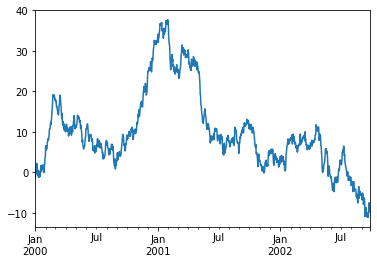

In [234]:
%matplotlib inline
ts.plot()

On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

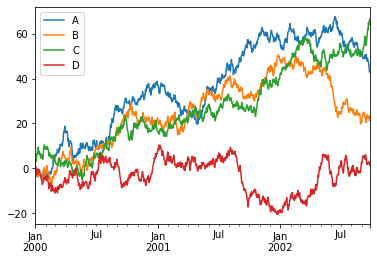

In [239]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

%matplotlib inline
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
## CSV

[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [240]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [241]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.442792,-0.564767,1.282765,1.479377
1,2000-01-02,-0.365672,0.321620,3.330143,0.146250
2,2000-01-03,-0.761198,-0.485905,3.770338,-0.715291
3,2000-01-04,-0.913781,-0.417748,3.384062,-0.614327
4,2000-01-05,-0.855367,0.026919,6.135939,-0.304169
...,...,...,...,...,...
995,2002-09-22,46.052184,22.728368,63.958527,2.885996
996,2002-09-23,45.210975,23.328948,65.898447,2.200030
997,2002-09-24,42.981192,21.153408,66.009913,1.975509
998,2002-09-25,42.849065,22.327733,66.032123,1.304625


## HDF5

Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [116]:
## df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [117]:
## pd.read_hdf('foo.h5','df')

## Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [118]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [119]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.423051,0.270805,0.376747,-0.266637
1,2000-01-02,-0.287435,-0.844725,1.470833,-1.523305
2,2000-01-03,-0.989039,0.190215,1.040923,-1.529523
3,2000-01-04,-1.232737,-0.680549,1.586044,-1.093323
4,2000-01-05,-0.989958,-0.301623,2.294115,-1.617585
...,...,...,...,...,...
995,2002-09-22,-30.057774,35.532491,-6.875782,-1.552643
996,2002-09-23,-31.783710,35.408478,-5.931945,-1.724407
997,2002-09-24,-32.120920,34.396406,-6.920172,-2.635258
998,2002-09-25,-30.190869,34.179231,-6.120496,-0.711310


# Gotchas
If you are trying an operation and you see an exception like:
<pre>    
&gt;&gt;&gt; if pd.Series([False, True, False]):
    print("I was true")
Traceback
    ...

ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
</pre>

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.

In [120]:
np.array([row[10] for row in array])

NameError: name 'array' is not defined